# Исследование факторов успешности игр для интернет-магазина 

<div style="border:solid black 2px; padding: 20px">    
    <b style='font-size:2rem'>Цель исследования:</b><br/>
    Выявить факторы, влияющие на успешность игр, для дальнейшего планирования рекламных кампаний<br/><br/>
    <b style='font-size:2rem'>Этапы исследования:</b><br/>
    <ul>
        <li>Предобработка данных</li>
        <li>Исследовательский анализ</li>
        <li>Составление пользовательских портретов по регионам</li>
        <li>Проверка гипотез о равенстве средних</li>
    </ul>
</div>

### Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('games.csv')

<i>Посмотрим на датасет в целом</i>

In [2]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<i>И на общую информацию о нём</i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<i>Посмотрим основные статистики для столбцов</i>

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Набор данных имеет простую и понятную структуру (небольшое количество столбцов упростит анализ), пропусков в данных немного (за исключением трёх последних столбцов). Основные статистики по числовым переменным тоже выглядят соответствующими действительности. Обработкой пропусков, а также остальными действиями по предобработке данных займёмся в следующем разделе</b></i>
</div>

### Предобработка данных

#### Переименование столбцов

<i>Приведём все имена столбцов к нижнему регистру. Пробелов в них нет, вариант с заменой его нижним подчёркиванием приемлем, оставим его</i>

In [5]:
#df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [6]:
df.columns = df.columns.str.lower()

#### Проверка дубликатов

<i>Проверим наличие явных дубликатов в данных</i>

In [7]:
df.duplicated().sum()

0

<i>Явных дубликатов нет, это хорошо. Перейдём к обработке пропусков</i>

#### Работа с пропусками

<i>Сначала разберёмся с пропусками, чтобы дальше было легче выполнять преобразование типов данных. Посмотрим, какой процент составляют пропуски в каждом столбце</i>

In [8]:
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


<i>Причины пропусков в оценках могут быть следующие:
    <ul>
        <li>Не по всем выпускаемым играм могли выставляться оценки (их довольно много, поэтому критики и игроки могли обойти вниманием менее известные тайтлы в пользу популярных)</li>
        <li>Система оценивания для старых игр появилась значительно позже их выхода, поэтому пользователи (да и критики) не всегда возвращались к своему давнему опыту, чтобы оценить ту или иную игру, в которую играли годами ранее</li>
    </ul>
Для рейтингов наличие пропусков тоже объяснимо - сама организация ESRB была основана только в 1994 году, поэтому старые (вышедшие до этого года) игры не могли получить от неё рейтинг. Также, возможно, на заре её создания не все компании обязаны были предоставлять свои игры к оцениванию.
    <br/><br/>
Перейдём к обработке пропусков</i>

<i>В столбцах с названием игры и её жанром всего по два пропуска - посмотрим, что это за игры, возможно, например, удастся восстановить жанр по названию</i>

In [9]:
df[df['name'].isna() | df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<i>Эти пропуски относятся к одним и тем же двум играм, поэтому полноценно выяснить, что это за игры, не получится, по крайней мере, в короткие сроки. Эти очень малая часть данных, которой смело можно пренебречь. Также удалим данные с пропусками в столбце year_of_release - количество пропусков здесь равно 2%, что тоже не превышает условного порога в 5%, который можно удалить из данных (нам это понадобится позже, при преобразовании типов). Перед этим посмотрим на записи, в которых не указан год выхода</i>

In [10]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<i>Да, записей действительно немного (относительно общего количества). В названии некоторых игр указан год, однако это может послужить и некоторой ловушкой - на самом деле, часто такие игры выходят в предыдущем указанному в названии году. Например, Madden NFL 2004 на самом деле вышла в 2003 году. Если бы количество таких записей было большим - можно было бы восстановить данные поиском в Интернете (и то, естественно, этот процесс следовало бы автоматизировать), что несомненно заняло бы значительное количество времени. В нашем случае компромиссом считаю удаление этих данных</i>

In [11]:
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

<div style="border:solid black 1px; padding: 10px"><i>Заполнение пропусков в столбцах с оценками критиков и пользователей считаю нецелесообразным, потому что нельзя выделить какой-то параметр, по которому можно усреднить (или взять медиану) - средняя оценка игр никак не зависит от года, платформы или жанра. Также нецелесообразно заполнять пропуски в столбце с рейтингом - здесь вообщенет никакого усреднения, а рейтинг игры - показатель сугубо индивидуальный, опять же, зависящий от некоторых факторов, но ни один из них не представлен в нашем наборе (за исключением жанра, но это не определяющий фактор)</i></div>

#### Преобразование типов данных

<i>Преобразуем год выхода игры к целочисленному типу. Однако сначала проверим, нет ли в этом столбце дробных значений</i>

In [12]:
df[(df['year_of_release'] - round(df['year_of_release'], 0)) > 0]['year_of_release'].count()

0

<i>Таких ошибочных записей нет, всё отлично, смело переводим в int</i>

In [13]:
df['year_of_release'] = df['year_of_release'].astype(int)

<i>Оценка от игроков - это явно дробное число. Произведём и это преобразование. Однако сделать это прямо сейчас нам помешают значения tbd в этом столбце. Такое значение указывается, если игра не набрала некое минимальное количество отзывов, необходимое для отображения оценки (чтобы избежать сильного влияния отдельных отзывов). Так как указать оценку в таком случае не представляется возможным, заменим такие значения на пропуски</i>

In [14]:
df['user_score'].replace(to_replace='tbd', value=np.nan, inplace=True)

<i>Теперь смело преобразуем тип во float</i>

In [15]:
df['user_score'] = df['user_score'].astype(float)

<i>Оценка критиков - это целое число. Проведём соответствующее преобразование. Однако напрямую перевести в int не получится из-за наличия пропусков в столбце. Поэтому сначала проверим, нет ли у нас оценок, дробная часть которых не равна 0 (т.е., по факту они не являются целыми числами), и если их всё-таки нет - переведём в nullable-тип Int64</i>

In [16]:
df[df['critic_score'] != np.ceil(df['critic_score'])]['critic_score'].count()

0

<i>Да, таких записей нет, поэтому смело выполняем преобразование</i>

In [17]:
df['critic_score'] = df['critic_score'].astype('Int64')

<i>Проверим, что всё сработало верно</i>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB


#### Подсчет суммарных продаж

<i>Запишем сумму продаж по всем регионам в столбец total_sales</i>

In [19]:
col_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['total_sales'] = df[col_list].sum(axis=1)

<i>Проверим, что вычисления произвелись корректно</i>

In [20]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


<i>Похоже, что игры в датасете отсортированы по убыванию общего количества продаж</i>

#### Обработка рейтингов

<i>Заполним пустые значения в столбце с рейтингом на Unknown и посмотрим частотное распределение рейтингов</i>

In [21]:
df['rating'].fillna('Unknown', inplace=True)

In [22]:
df['rating'].value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

<i>Последние 4 строчки, которые встречаются очень редко, тоже можно обработать. Рейтинг AO - это аналог рейтинга M, K-A - так обозначались те же игры, что и имеющие рейтинг E, к ним же (с рейтингом E) можно прибавить и игры EC, хоть они и немного различаются, но незначительно для целей нашего исследования. RP - это статус ожидания присвоения рейтинга, поэтому его можно изменить на Unknown</i>

In [23]:
replacement = {'EC' : 'E', 'K-A' : 'E', 'AO' : 'M', 'RP' : 'Unknown'}
df['rating'].replace(replacement, regex=True, inplace=True)

<i>Проверим, что все преобразовалось так, как надо</i>

In [24]:
df['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Предобработка данных проведена. Явных дубликатов не нашлось, пропуски удалены (там, где это возможно и не лишено смысла). Некоторые данные преобразованы к более подходящим типам, а также добавлен столбец с общим числом продаж - пригодится на этапе анализа</b></i>
</div>

### Исследовательский анализ

#### Исследование выпускаемых игр по годам

<i>Посмотрим на распределение количества выпускаемых игр по годам</i>

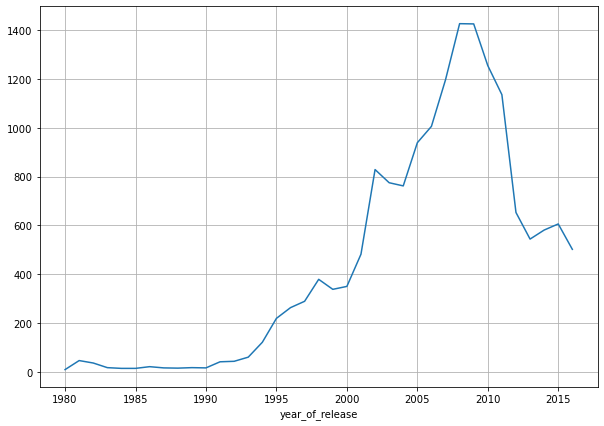

In [25]:
df.groupby(by='year_of_release')['name'].count().plot(kind='line', grid=True, figsize=(10,7));

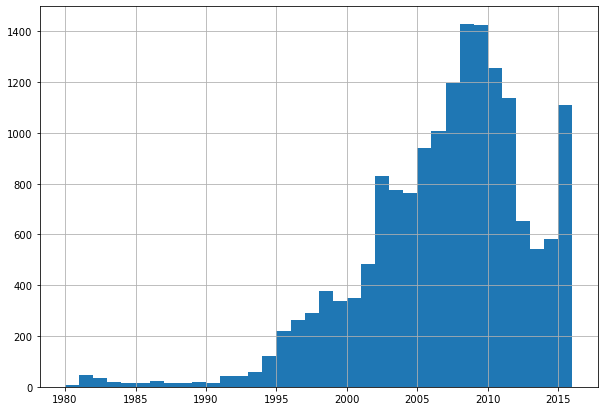

In [26]:
df['year_of_release'].hist(bins=36, figsize=(10,7));

<i>Взглянем внимательнее на период с 1990 до 2005 года - там наблюдается значительный рост</i>

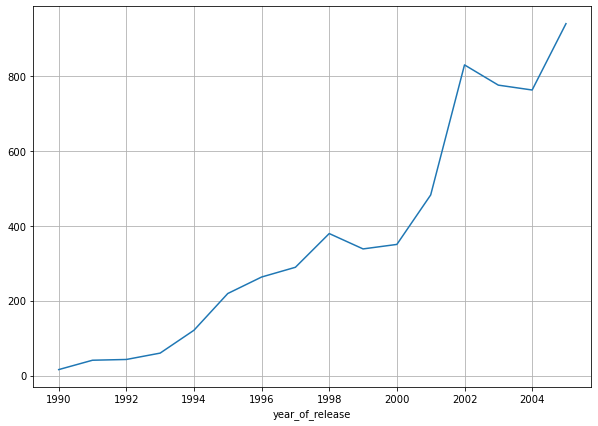

In [27]:
df[(df['year_of_release'] >= 1990) & (df['year_of_release'] <= 2005)].groupby(by='year_of_release')['name'].count().plot(kind='line', grid=True, figsize=(10,7));

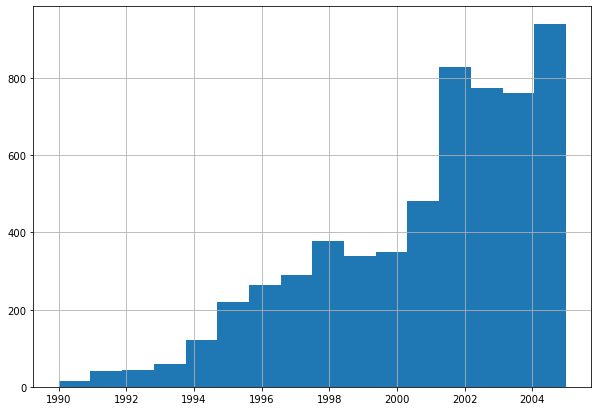

In [28]:
df['year_of_release'].hist(bins=16, range=(1990,2005), figsize=(10,7));

In [29]:
year_pivot = df.pivot_table(index='year_of_release', aggfunc='count')
year_pivot['name']

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<i>Наблюдаем два больших скачка (относительно предыдущего года) количества игр - в 1994 и 2002 годах. Начиная с 1994 года мы видим цифры, характеризующие общий тренд, сохраняющийся до настоящего времени - перманентный рост количества выпускаемых игр. При этом начиная с 2012 года общее количество игр за год значительно меньше, чем в предыдущие несколько лет, однако выбрасывать эти данные из рассмотрения мы не можем - во-первых, это самая актуальная информация, а во-вторых, и в эти годы (2012-2016) вышло немалое количество игр, так что эти данные тоже будут полезны для анализа. Таким образом, условимся для начала не рассматривать для дальнейшего анализа игры, вышедшие раньше 1994 года</i>

In [30]:
df = df[df['year_of_release'] >= 1994]

#### Исследование продаж по платформам

<i>Посмотрим, на каких платформах суммарные продажи игр были самыми высокими</i>

In [31]:
platform_sales_pivot = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales_pivot.sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76


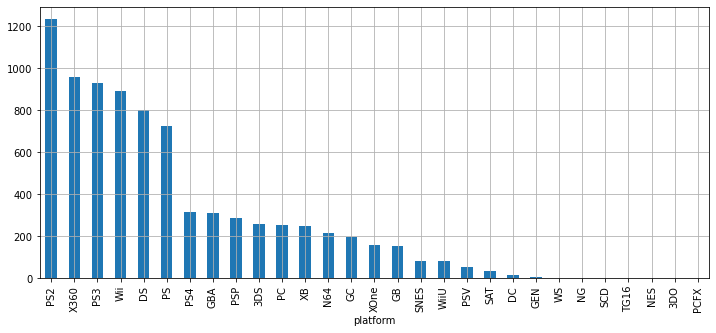

In [32]:
df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12,5));

<i>Посмотрим на количество выпускаемых игр для трёх платформ с наибольшими суммарными продажами</i>

In [33]:
df[df['platform'] == 'PS2'].groupby(by='year_of_release')['name'].count()

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    214
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64

In [34]:
df[df['platform'] == 'X360'].groupby(by='year_of_release')['name'].count()

year_of_release
2005     18
2006     93
2007    123
2008    146
2009    172
2010    182
2011    206
2012    106
2013     75
2014     63
2015     35
2016     13
Name: name, dtype: int64

In [35]:
df[df['platform'] == 'PS3'].groupby(by='year_of_release')['name'].count()

year_of_release
2006     27
2007     90
2008    138
2009    162
2010    181
2011    215
2012    148
2013    126
2014    108
2015     73
2016     38
Name: name, dtype: int64

<i>В среднем срок жизни платформы - порядка 8-10 лет (актуально для платформ 7 поколения, в дальнейшем этот показатель примет тренд на снижение). Понятно, что игры будут выходить и после этого срока (например, ежегодные обновления спортивных симуляторов), однако основная масса продаж приходится именно на этот срок. Поэтому для дальнейшего исследования усиливаем предыдущее условие (игры с 2002 года) и возьмём верхнюю границу периода - последние 10 лет: с 2007 по 2016 годы, однако разобьём эти данные на две группы: с 2007 по 2011 год, и с 2012 по 2016 год (в силу того, что в датасете с 2012 года наблюдался провал в общем количестве игр</i>

<i>Посмотрим на общее количество продаж с 2007 по 2011 годы по платформам</i>

In [36]:
import warnings

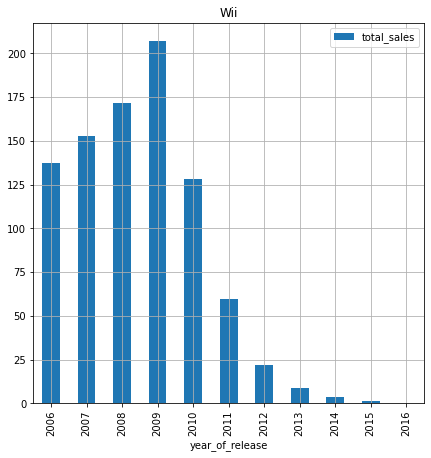

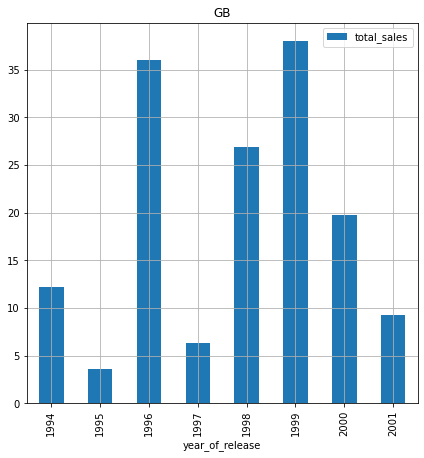

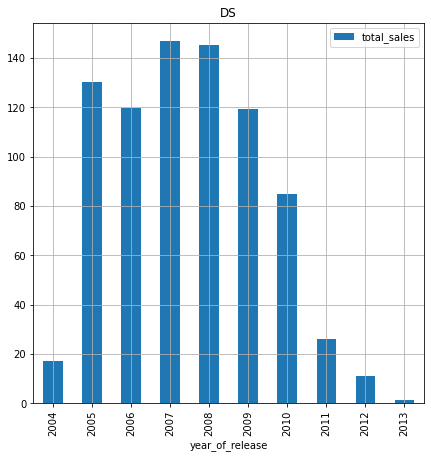

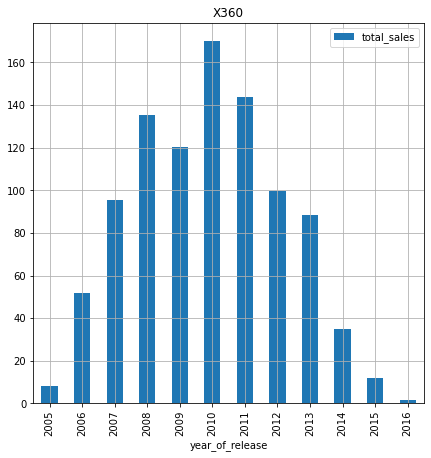

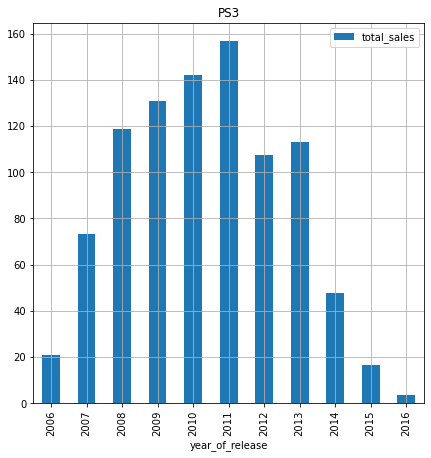

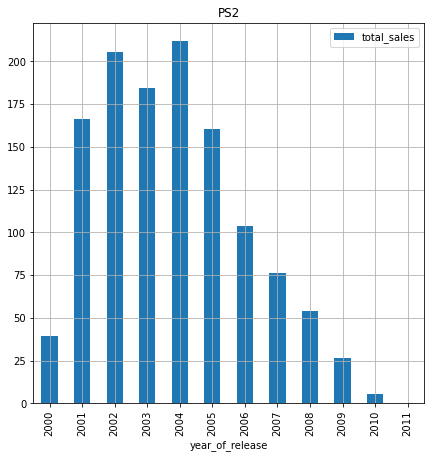

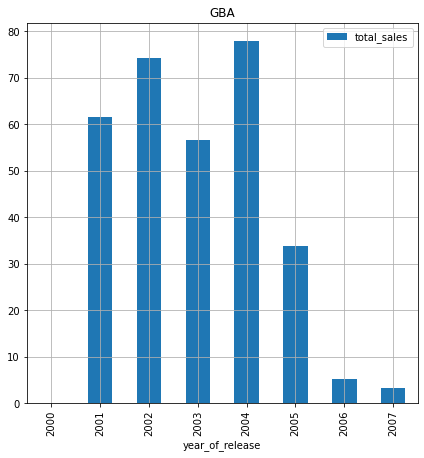

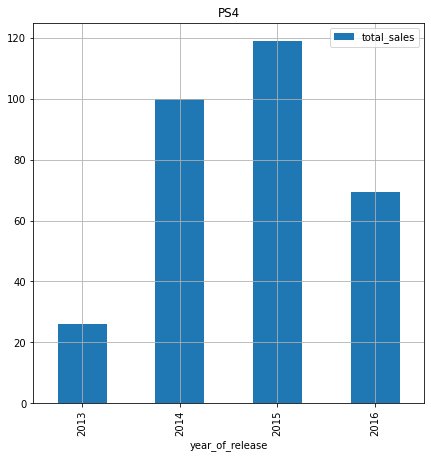

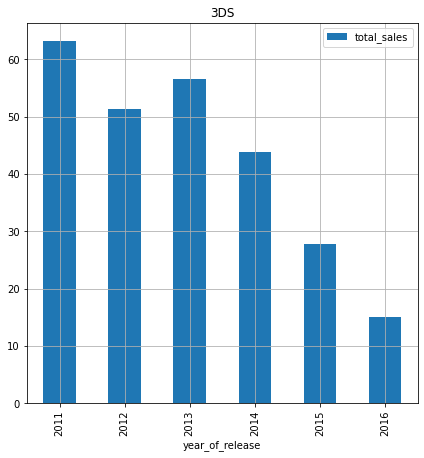

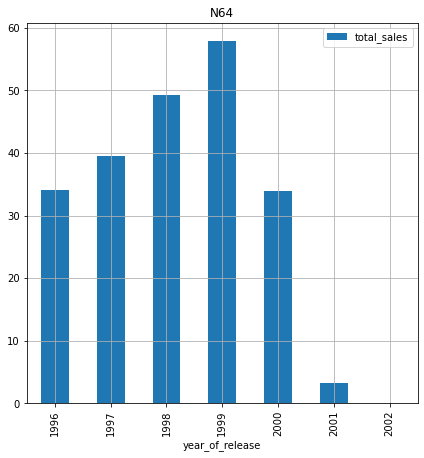

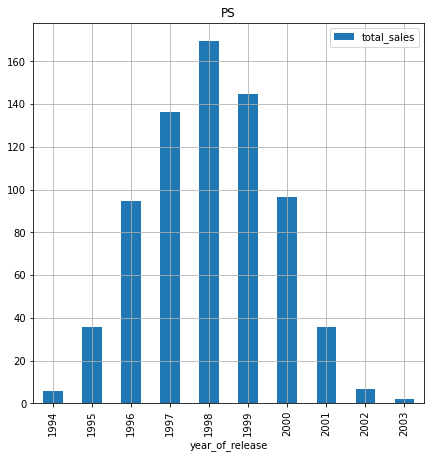

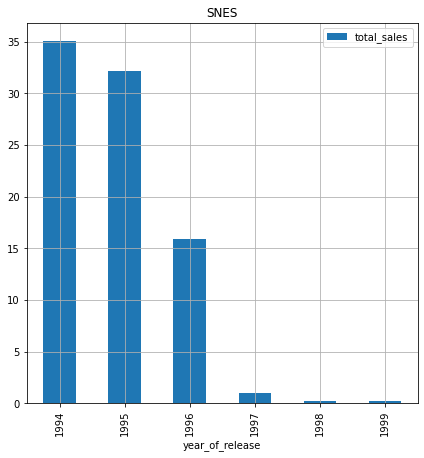

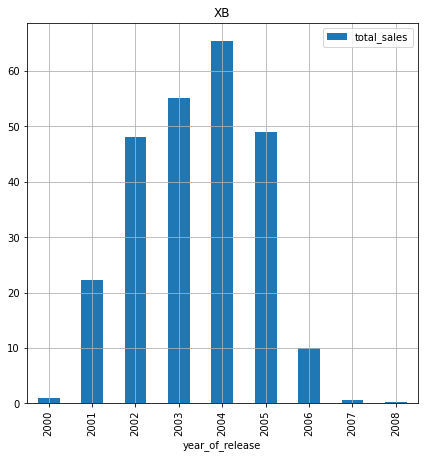

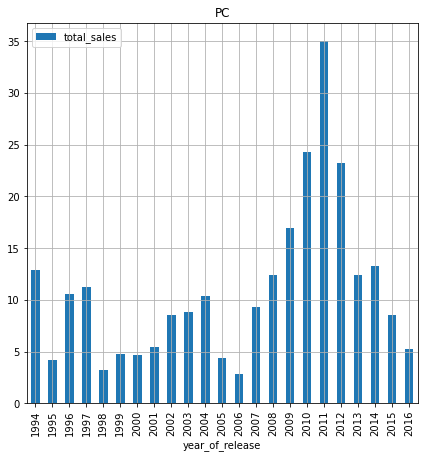

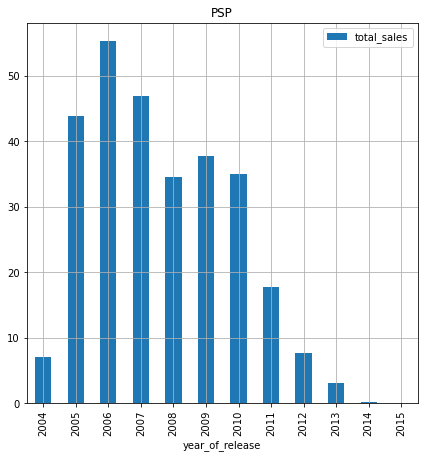

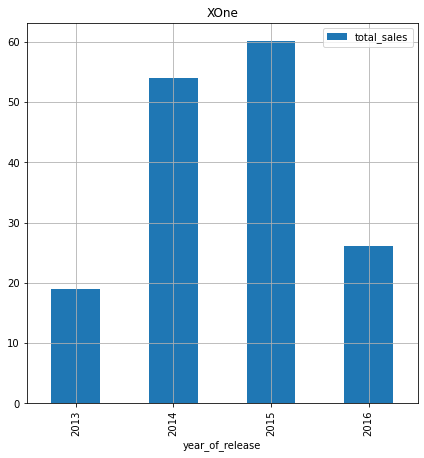

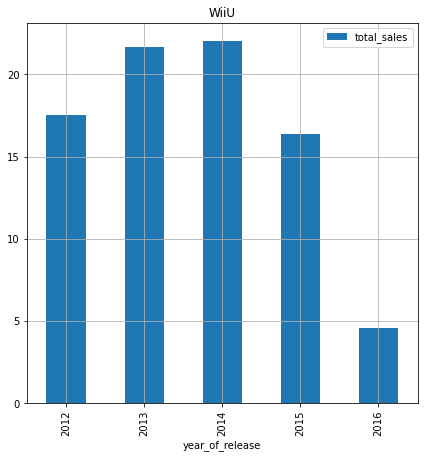

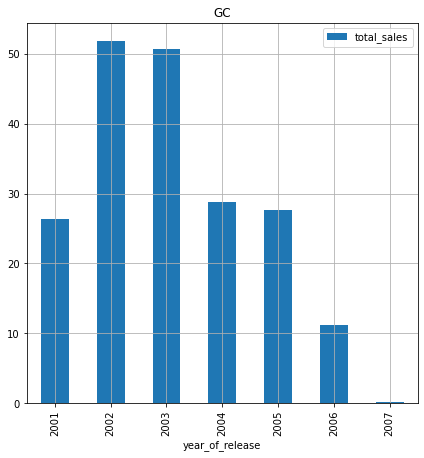

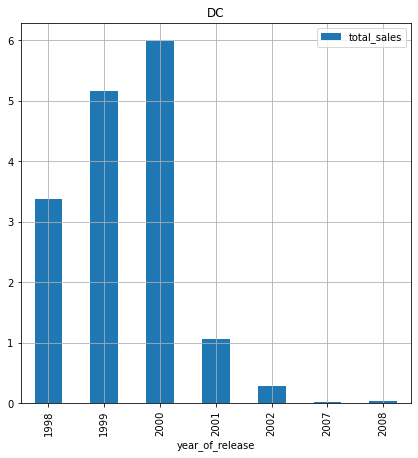

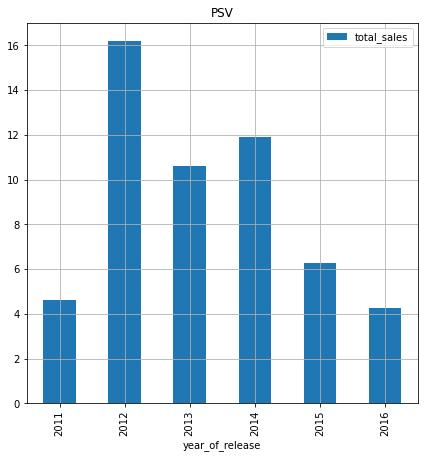

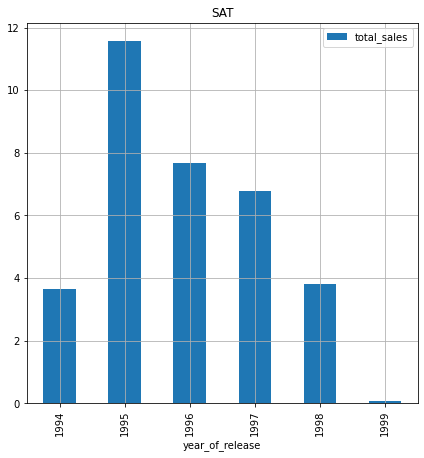

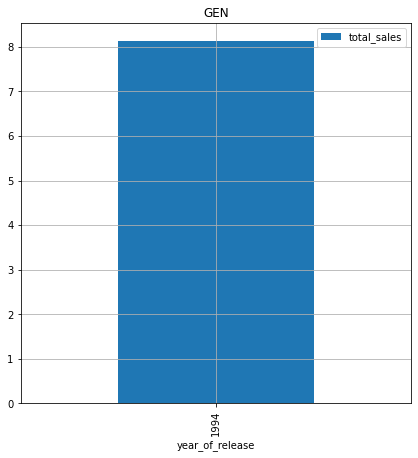

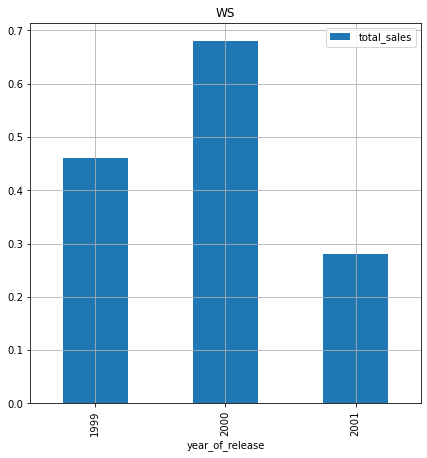

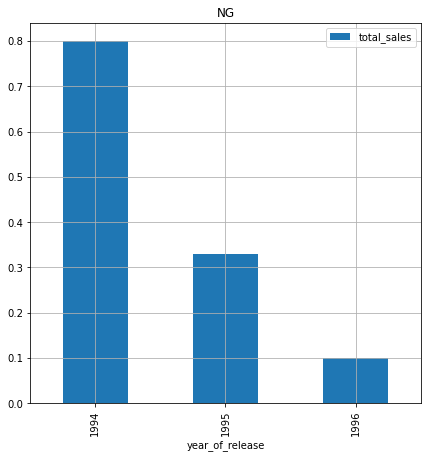

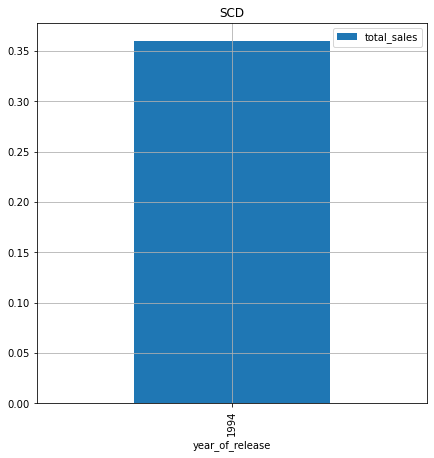

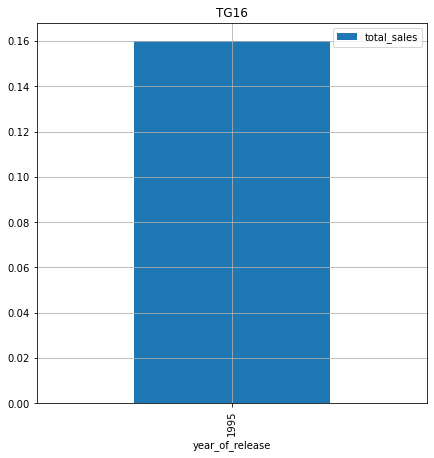

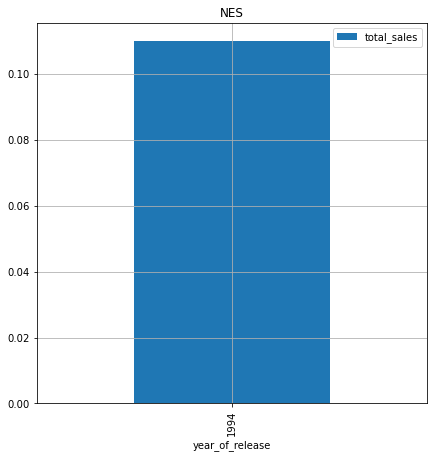

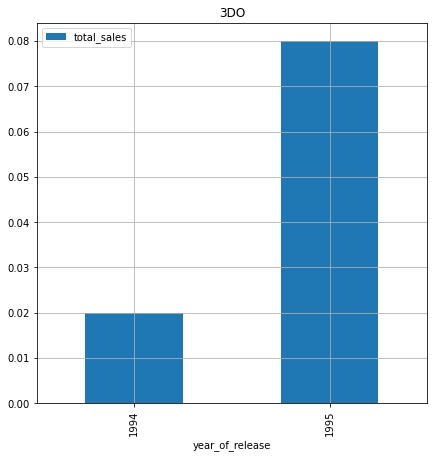

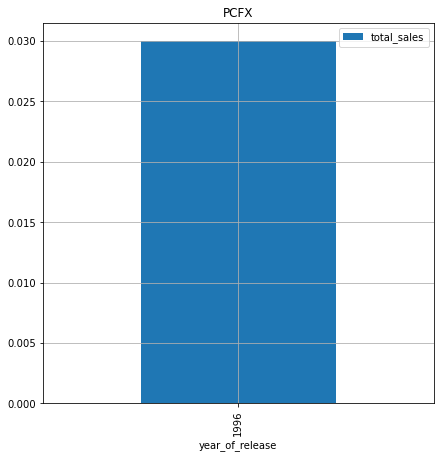

In [37]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    for platform in df['platform'].unique():
        try:
            df_platform_pivot = df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            df_platform_pivot.plot(grid=True, title=platform, xlim=(1994, 2016), kind='bar', figsize=(7,7));
        except:
            pass

In [38]:
most_successful = df[df['year_of_release'] >= 2012].groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False).head(10)
most_successful

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64

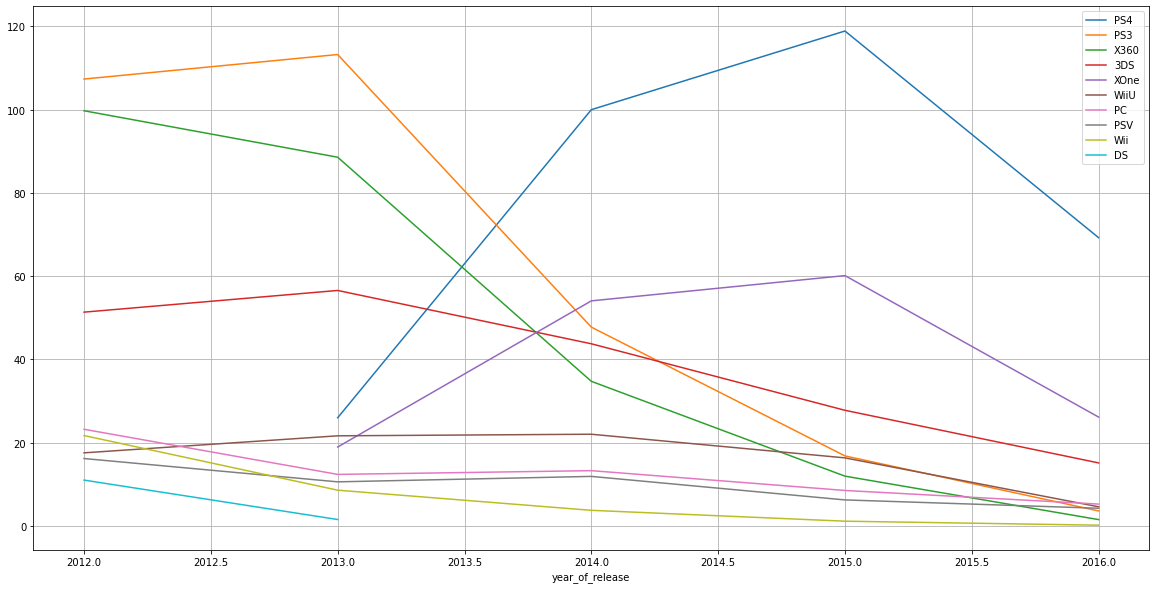

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for platform in most_successful.index:
    df[(df['year_of_release'] >= 2012) & (df['platform'] == platform)].groupby(by='year_of_release')['total_sales'].sum().plot(legend=True, figsize=(20,10), grid=True, ax=ax);
ax.legend(most_successful.index);

<div style="border:solid black 1px; padding: 10px"><i>Выделим наиболее перспективные платформы с точки зрения продаж на следующий год. Как критерий возьмём факт отсутствия тенденции к постоянному падению продаж за последние годы (с 2012 и далее).<br/>
С учетом вышесказанного, остановим свой выбор на платформах PS4 и Xbox One (несмотря на то, что для некоторых консолей суммарные продажи за этот период больше, однако они имеют склонность к падению продаж). Также к рассмотрению добавим к ним PC как платформу, которая не подвержена смене поколений.<br/>
Таким образом, будем рассматривать три платформы: PS4, XOne и PC с данными за 2012 год и позже (как актуальный период для этих платформ)</i></div>

In [40]:
df_analysis = df[(df['platform'].isin(['PS4', 'XOne', 'PC'])) & (df['year_of_release'] >= 2012)]

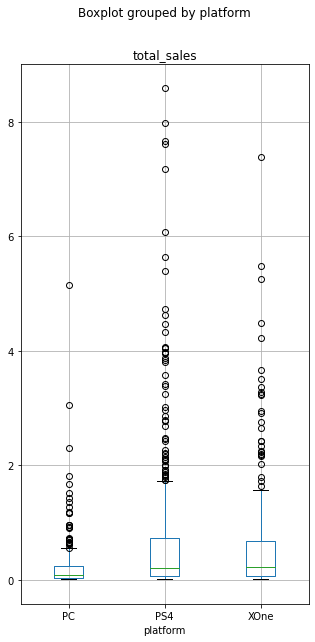

In [41]:
df_analysis[df_analysis['total_sales'] < 10].boxplot(column=['total_sales'], by='platform', figsize=(5,10));

<div style="border:solid black 1px; padding: 10px"><i>Медианные и квартильные значения у двух самых перспективных платформ практически идентичны, однако на PS4 больше выбросов, которые в нашем случае означают очень успешные продажи. Поэтому в маркетинговых целях рекомендую опираться в первую очередь на эту платформу. Исследуем зависимость продаж от рейтингов игр на PS4</i></div>

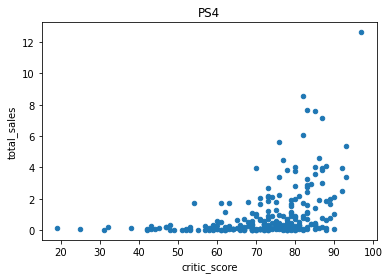

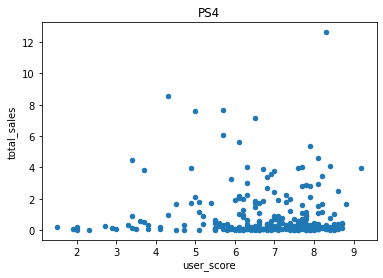

In [42]:
df_ps4 = df[(df['year_of_release'] > 2011) & (df['platform'] == 'PS4')]
for factor in ['critic_score', 'user_score']:    
    df_ps4.plot(x=factor, y='total_sales', kind='scatter', title='PS4')

<i>По графикам видно наличие некоторой зависимости (не однозначно ярко выраженной, но всё же просматривающейся) общих продаж от оценок критиков - особенно это заметно для игр, оценка которых больше 60. Что касается пользовательской оценки - её влияние на продажи незаметно. Посчитаем коэффициенты корреляции</i>

In [43]:
for factor in ['critic_score', 'user_score']:
    print('Коэффициент корреляции продаж на платформе PS4 с параметром {} равен {}'.format(factor, df_ps4['total_sales'].corr(df_ps4[factor].astype(float))))  

Коэффициент корреляции продаж на платформе PS4 с параметром critic_score равен 0.40656790206178123
Коэффициент корреляции продаж на платформе PS4 с параметром user_score равен -0.03195711020455643


<i>Наши наблюдения подтвердились численно. Пользовательская оценка никак не коррелирует с объёмом продаж, в то время как между оценкой критиков и продажами зависимость есть, хоть и не очень сильная. Поэтому ориентироваться стоит только на оценки критиков. Проверим это на двух других платформах</i>

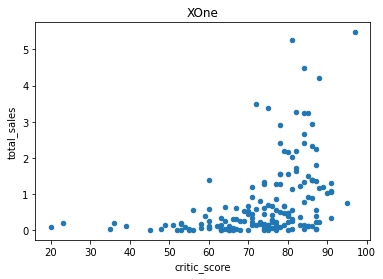

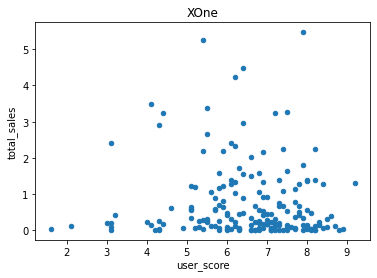

In [44]:
df_xone = df[(df['year_of_release'] > 2011) & (df['platform'] == 'XOne')]
for factor in ['critic_score', 'user_score']:    
    df_xone.plot(x=factor, y='total_sales', kind='scatter', title='XOne')

In [45]:
for factor in ['critic_score', 'user_score']:
    print('Коэффициент корреляции продаж на платформе XOne с параметром {} равен {}'.format(factor, df_xone['total_sales'].corr(df_xone[factor].astype(float))))  

Коэффициент корреляции продаж на платформе XOne с параметром critic_score равен 0.41699832800840153
Коэффициент корреляции продаж на платформе XOne с параметром user_score равен -0.06892505328279418


<i>Для платформы Xbox One имеем такие же результаты</i>

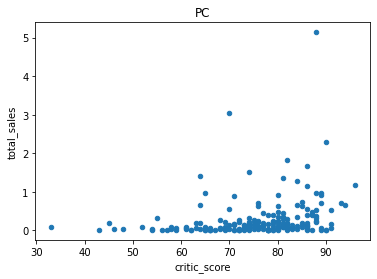

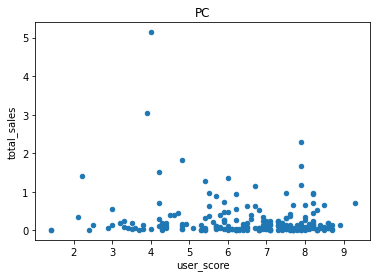

In [46]:
df_pc = df[(df['year_of_release'] > 2011) & (df['platform'] == 'PC')]
for factor in ['critic_score', 'user_score']:    
    df_pc.plot(x=factor, y='total_sales', kind='scatter', title='PC')

In [47]:
for factor in ['critic_score', 'user_score']:
    print('Коэффициент корреляции продаж на платформе PC с параметром {} равен {}'.format(factor, df_pc['total_sales'].corr(df_pc[factor].astype(float))))  

Коэффициент корреляции продаж на платформе PC с параметром critic_score равен 0.23724324311567907
Коэффициент корреляции продаж на платформе PC с параметром user_score равен -0.12186747630735571


<i>На PC же оценки практически никак не влияют на объёмы продаж</i>

#### Исследование продаж по жанрам

<i>Построим сводную таблицу суммарного и медианного количества продаж игр по жанрам</i>

In [48]:
genre_sales_pivot = df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'median'])

In [49]:
genre_sales_pivot.columns = ['sum', 'median']
genre_sales_pivot

,sum,median
genre,,
Action,1646.62,0.18
Adventure,213.99,0.05
Fighting,411.05,0.20
Misc,776.53,0.16
Platform,640.59,0.24
Puzzle,159.90,0.09
Racing,694.59,0.18
Role-Playing,895.60,0.18
Shooter,976.24,0.23


<i>Построим соответствующие графики</i>

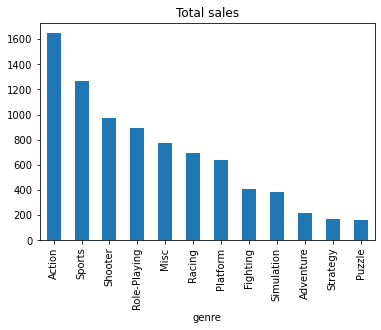

In [50]:
genre_sales_pivot['sum'].sort_values(ascending=False).plot(kind='bar', title='Total sales');

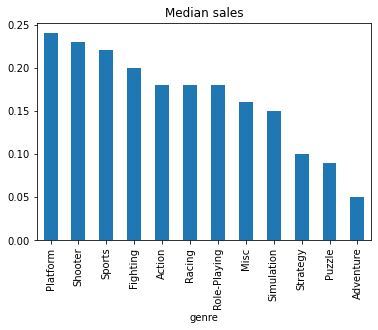

In [51]:
genre_sales_pivot['median'].sort_values(ascending=False).plot(kind='bar', title='Median sales');

<i>Самые прибыльные жанры с точки зрения суммарных продаж - экшн-игры, спортивные симуляторы и шутеры. Однако, чтобы исключить влияние отдельных игр-бестселлеров, рассмотрели также и медианные продажи по жанрам - и здесь самый популярный жанр оказался лишь на 5 месте, а вперёд вышли платформеры. Самыми устойчивыми в плане рассмотрения продаж в обеих проекциях вышли жанры спортивных симуляторов и шутеры. В первую очередь рекомендуется сфокусировать рекламные кампании именно на этих жанрах. Игры жанров паззл, приключения и стратегии - самые неприбыльные. У них не самая широкая целевая аудитория, поэтому удивляться невысоким цифрам продаж не стоит</i>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>
        <ul>
            <li>С учётом срока жизни платформ потенциально наиболее прибыльными являются PS4 и XOne - ориентироваться следует на них</li>
            <li>Оценки критиков (игровых изданий и др.) оказывают слабое влияние на суммарные продажи на этих платформах, однако мы не можем сказать, что связи совсем нет</li>
            <li>Лучше всего суммарно и в среднем продаются игры жанров Sports и Shooter</li>
        </ul>
    </b></i>
</div>

### Портрет пользователей в регионах

#### Самые популярные платформы по регионам

<i>Сруппируем платформы по суммам продаж в разных регионах</i>

In [52]:
platform_pivot = df.groupby(by='platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

<i>Переименуем столбцы и выведем получившуюся таблицу</i>

In [53]:
regions = ['NA', 'EU', 'JP']
platform_pivot.columns = regions
platform_pivot

,NA,EU,JP
platform,,,
3DO,0.00,0.00,0.10
3DS,82.65,61.27,100.62
DC,5.43,1.69,8.56
DS,380.31,188.41,175.00
GB,56.24,33.87,56.39
GBA,184.12,74.59,46.56
GC,131.94,38.32,21.34
GEN,5.21,1.68,0.93
N64,138.91,41.03,33.76


<i>Для каждого региона выведем топ-5 платформ по суммам продаж в процентах</i>

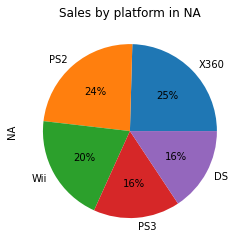

In [54]:
platform_pivot['NA'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by platform in NA');

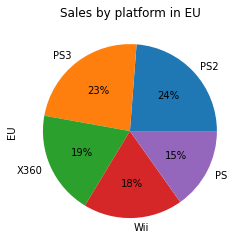

In [55]:
platform_pivot['EU'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by platform in EU');

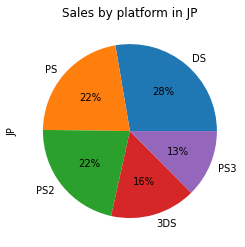

In [56]:
platform_pivot['JP'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by platform in JP');

<i>Япония - регион со своей спецификой, тут, естественно, будут преобладать игры на платформах местного производства (Nintendo и Sony PS, причём Nintendo всё же популярнее). В Европе самые популярные платформы - PS2 и PS3 (на них на тот момент вышло больше всего ААА-тайтлов и в целом популярных игр), в Америке же самая популярная консоль - Xbox 360 от местного гиганта Microsoft. В Европе же она занимает только 3 место по продажам (очевидно, в Америке была выстроена более сильная маркетинговая кампания по продвижению "родной" консоли)</i>

#### Самые популярные жанры по регионам

<i>Сгруппируем жанры по суммам продаж в разных регионах</i>

In [57]:
genre_pivot = df.groupby(by='genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

<i>Переименуем столбцы и выведем получившуюся таблицу</i>

In [58]:
genre_pivot.columns = regions
genre_pivot

,NA,EU,JP
genre,,,
Action,814.68,503.47,147.30
Adventure,91.92,59.56,46.55
Fighting,208.11,95.48,72.11
Misc,393.92,209.69,99.97
Platform,333.71,175.76,84.07
Puzzle,71.27,42.74,35.10
Racing,342.82,230.32,46.86
Role-Playing,328.41,188.08,321.40
Shooter,531.30,310.80,31.73


<i>Для каждого региона выведем топ-5 жанров по суммам продаж</i>

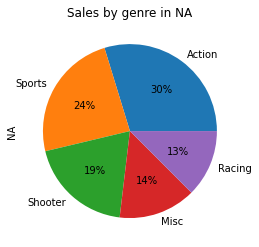

In [59]:
genre_pivot['NA'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by genre in NA');

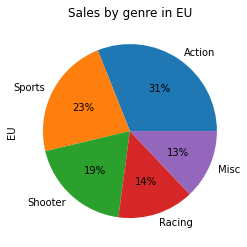

In [60]:
genre_pivot['EU'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by genre in EU');

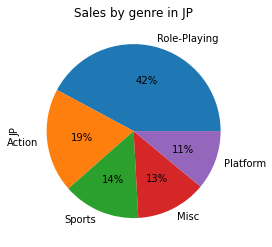

In [61]:
genre_pivot['JP'].sort_values(ascending=False).head().plot(kind='pie', autopct='%1.0f%%', title='Sales by genre in JP');

<i>В Европе и Северной Америке самые популярные жанры практически полностью совпадают - экшен-игры, спортивные и шутеры. Единственное различие - в Европе больше играют в гоночные симуляторы, а в Америке - в платформеры. В Японии же самый популярный жанр (с большим отрывом от 2 места, больше чем в 2 раза) - это ролевые игры. Есть даже отдельный поджанр - JRPG, популярный по большей части в Азии (и специфический для всех остальных), поэтому такой расклад ожидаемый - в остальных регионах ролевые игры не входят даже в топ-5. В остальном же в Японии играют по большей части в игры тех же жанров, что и в Европе и Америке</i>

#### Влияние рейтинга ESRB на продажи

<i>Создадим сводную таблицу по суммам продаж в разных регионах по разным категориям рейтинга</i>

In [62]:
rating_pivot = df.groupby(by='rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

<i>Переименуем столбцы и выведем получившуюся сводную таблицу</i>

In [63]:
rating_pivot.columns = regions
rating_pivot

,NA,EU,JP
rating,,,
E,1278.33,704.25,199.42
E10+,345.50,183.33,40.20
M,744.13,480.61,63.58
T,747.58,420.99,150.70
Unknown,902.99,551.36,650.35


<i>Для каждого региона отсортируем рейтинговые группы по количеству продаж</i>

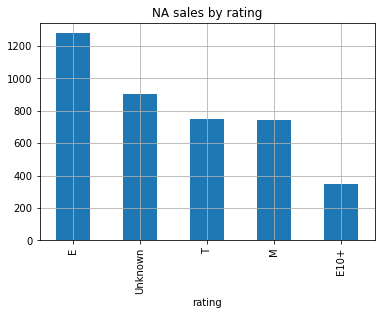

In [64]:
rating_pivot['NA'].sort_values(ascending=False).plot(kind='bar', grid='True', title='NA sales by rating');

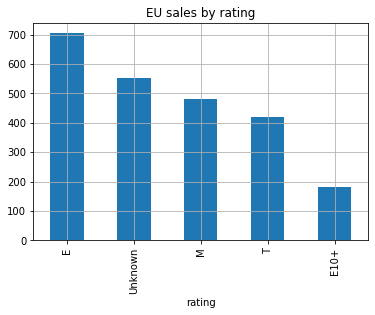

In [65]:
rating_pivot['EU'].sort_values(ascending=False).plot(kind='bar', grid='True', title='EU sales by rating');

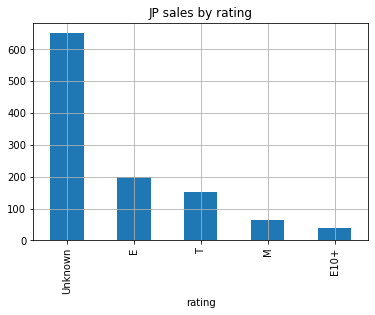

In [66]:
rating_pivot['JP'].sort_values(ascending=False).plot(kind='bar', grid='True', title='JP sales by rating');

<i>В Европе и Северной Америке самыми популярными являются игры "для всех", от 6 лет. Что касается Японии - тут нельзя сделать однозначного вывода из наших данных, потому что на первом месте с отрывом в несколько раз по продажам игры с неизвестным рейтингом. Предположу, что это связано с тем, что в Японии игры оцениваются по собственной рейтинговой системе CERO</i>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Как и ожидалось, самый специфический по платформенным, жанровым и рейтинговым предпочтениям регион - это Япония. Продавая игру там, разработчик и издатель должны учитывать особенности местного рынка (популярность ролевых игр, собственная рейтинговая система). Для Европы и Северной Америки же предпочтения, по большему счёту, идентичны. Здесь хорошо продаются игры для детей, спортивные симуляторы, экшн-игры и шутеры (большинство крупных, популярных тайтлов относится именно к этим жанрам)</b></i>
</div>

### Проверка гипотез

<i>Возьмём наиболее актуальные данные для проверки гипотез (с 2012 по 2016 годы)</i>

In [67]:
df_hypothesis = df[df['year_of_release'] >= 2012]

#### Проверка гипотезы о рейтингах платформ

<i>Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформулируем нулевую и альтернативную гипотезы. Установим уровень значимости 0.05

```
H0: Средний пользовательский рейтинг игр на платформе Xbox One = Средний пользовательский рейтинг игр на платформе PC
H1: Средний пользовательский рейтинг игр на платформе Xbox One ≠ Средний пользовательский рейтинг игр на платформе PC
alpha = 0.05
```
</i>

In [68]:
from scipy import stats as st

In [69]:
xbox_one = df_hypothesis[df_hypothesis['platform'] == 'XOne']['user_score']
pc = df_hypothesis[df_hypothesis['platform'] == 'PC']['user_score']

results = st.ttest_ind(xbox_one, pc, equal_var=False, nan_policy='omit')
alpha = 0.05

print('p-value равно:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 0.5489537965134426
Не получилось отвергнуть нулевую гипотезу


<i>Дополнительно выведем средние пользовательские оценки по платформам</i>

In [70]:
print('Средняя оценка на платформе Xbox One:', xbox_one.mean())
print('Средняя оценка на платформе PC:', pc.mean())

Средняя оценка на платформе Xbox One: 6.52142857142857
Средняя оценка на платформе PC: 6.428640776699027


<i>Итак, наша нулевая гипотеза не отвергается - мы можем сделать предположение, что средние оценки пользователей на этих двух платформах равны. И средние значения оценок по всем играм на этих платформах действительно очень близки</i>

#### Проверка гипотезы о рейтингах жанров

<i>Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различаются. Сформулируем нулевую и альтернативную гипотезы. Установим уровень значимости 0.05

```
H0: Средний пользовательский рейтинг игр жанра Action = Средний пользовательский рейтинг игр жанра Sports
H1: Средний пользовательский рейтинг игр жанра Action ≠ Средний пользовательский рейтинг игр жанра Sports
alpha = 0.05
```
</i>

In [71]:
action = df_hypothesis[df_hypothesis['genre'] == 'Action']['user_score']
sports = df_hypothesis[df_hypothesis['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action, sports, equal_var=False, nan_policy='omit')
alpha = 0.05

print('p-value равно:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value равно: 4.2430777657264175e-20
Отвергаем нулевую гипотезу


In [72]:
print('Средняя оценка жанра Action:', action.mean())
print('Средняя оценка жанра Sports:', sports.mean())

Средняя оценка жанра Action: 6.825047801147237
Средняя оценка жанра Sports: 5.455897435897437


<i>Итак, нулевую гипотеза о том, что средние оценки пользователей по этим жанрам равны, можно опровергнуть (p-value меньше, чем 0.01, а уж тем более меньше, чем 0.05). Таким образом, наше изначальное предположение о том, что средние оценки по этим жанрам разные, скорее всего верно. Это видно и по общей средней оценке: игры жанра Action за последние годы оцениваются почти на полтора балла выше</i>

<div style="font-size:2rem; font-weight:bold">Вывод</div>
<p></p>
<div style="border:solid green 2px; padding: 20px">
    <i><b>Оба наших изначальных предположения подтвердилисьь - весьма вероятно, что средние пользовательские рейтинги для платформ Xbox One и PC равны, а вот средние пользовательские оценки игр жанров Action и Sports значимо различаются</b></i>
</div>

### Общий вывод

<div style="border:solid green 4px; padding: 20px">
    <i><b>
        После проведения исследования мы можем сформулировать выводы, позволяющие спрогнозировать, какие игры будут наиболее успешными по числу продаж:
        <ul>
            <li>Больше всего продаж - на игровых консолях (не на PC). Учитывая, что консоли имеют свойство смены поколений, на текущий период времени стоит обратить своё внимание на такие платформы, как PS4 и XOne, которые ещё не успели морально (с точки зрения игровой общественности) устареть</li>
            <li>Если основной упор будет сделан на азиатский рынок - тогда следует ориентироваться на платформы Sony и Nintendo (наиболее актуальные на момент исследования - WiiU и 3DS)</li>
            <li>Что касается жанров - во всех регионах лучше в среднем всего будут продаваться спортивные симуляторы и шутеры. Если, опять же, основная ставка сделана на азиатский рынок - там больший успех будут иметь ролевые игры</li>
            <li>Из предыдущих двух пунктов явно следует, что общий успех во многом определяется регионами, в которых будут продвигаться и продаваться игры, однако игры на PS4 указанных в предыдущем пункте жанров будут успешны везде</li>
            <li>При продвижении игр на игровых консолях следует обратить внимание на оценки критиков - возможно, поработать с игровыми журналами и интернет-изданиями, провести совместные промо-акции. Пользовательские оценки же хоть и важны, но на объём продаж существенного влияния не оказывают</li>
            <li>Также при продвижении на азиатском рынке следует отметить тот факт, что рейтинговая система ESRB там учитывается в гораздо меньшей степени, чем местная</li>
        </ul>
    </b></i>
</div>